In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette()

In [125]:
df = pd.read_csv('./data/AirQualityUCI/AirQualityUCI.csv',delimiter=';',parse_dates=[['Date','Time']]).iloc[:,:-2]
df.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004 18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004 19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004 20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004 21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004 22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [126]:
df = df.dropna()

In [127]:
new_var_names = [
    'Date_Time',
    'CO_true',
    'CO_sensor',
    'NMHC_true',
    'C6H6_true',
    'NMHC_sensor',
    'NOX_true',
    'NOX_sensor',
    'NO2_true',
    'NO2_sensor',
    'O3_sensor',
    'T',
    'RH',
    'AH',    
]

df.columns = new_var_names

In [128]:
df.head()

,Date_Time,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOX_true,NOX_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
0,10/03/2004 18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004 19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004 20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004 21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004 22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date_Time    9357 non-null   object 
 1   CO_true      9357 non-null   object 
 2   CO_sensor    9357 non-null   float64
 3   NMHC_true    9357 non-null   float64
 4   C6H6_true    9357 non-null   object 
 5   NMHC_sensor  9357 non-null   float64
 6   NOX_true     9357 non-null   float64
 7   NOX_sensor   9357 non-null   float64
 8   NO2_true     9357 non-null   float64
 9   NO2_sensor   9357 non-null   float64
 10  O3_sensor    9357 non-null   float64
 11  T            9357 non-null   object 
 12  RH           9357 non-null   object 
 13  AH           9357 non-null   object 
dtypes: float64(8), object(6)
memory usage: 1.1+ MB


In [130]:
for var in df.columns[1:]:
    if df[var].dtype=='object':
        df[var] = df[var].str.replace(',','.')
        df[var] = pd.to_numeric(df[var])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date_Time    9357 non-null   object 
 1   CO_true      9357 non-null   float64
 2   CO_sensor    9357 non-null   float64
 3   NMHC_true    9357 non-null   float64
 4   C6H6_true    9357 non-null   float64
 5   NMHC_sensor  9357 non-null   float64
 6   NOX_true     9357 non-null   float64
 7   NOX_sensor   9357 non-null   float64
 8   NO2_true     9357 non-null   float64
 9   NO2_sensor   9357 non-null   float64
 10  O3_sensor    9357 non-null   float64
 11  T            9357 non-null   float64
 12  RH           9357 non-null   float64
 13  AH           9357 non-null   float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [132]:
df['Date_Time'] = df['Date_Time'].str.replace('.',':')
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

C:\Users\21ckw\AppData\Local\Temp/ipykernel_12436/3918135029.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Date_Time'] = df['Date_Time'].str.replace('.',':')


In [133]:
df.to_csv('./data/air_pollution.csv',index=False)

# air pollution

In [134]:
df = pd.read_csv('./data/air_pollution.csv',parse_dates=['Date_Time'],index_col=0)
df.head()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOX_true,NOX_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-10-03 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [136]:
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

# barplot

In [141]:
df.head()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOX_true,NOX_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH,year,month,hour
Date_Time,,,,,,,,,,,,,,,,
2004-10-03 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,10,18
2004-10-03 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,10,19
2004-10-03 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,10,20
2004-10-03 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,10,21
2004-10-03 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,10,22


In [148]:
df.columns

Index(['CO_true', 'CO_sensor', 'NMHC_true', 'C6H6_true', 'NMHC_sensor',
       'NOX_true', 'NOX_sensor', 'NO2_true', 'NO2_sensor', 'O3_sensor', 'T',
       'RH', 'AH', 'year', 'month', 'hour'],
      dtype='object')

<AxesSubplot:xlabel='month', ylabel='CO_true'>

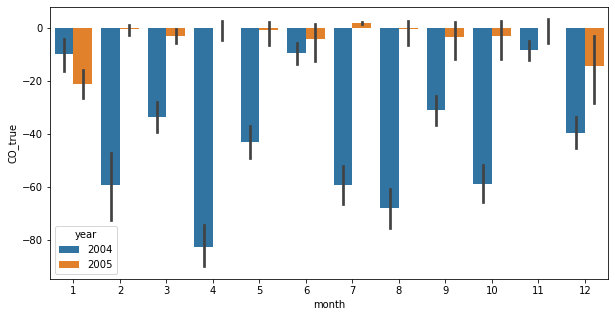

In [149]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='month', y='CO_true', hue='year')

<AxesSubplot:xlabel='hour', ylabel='CO_true'>

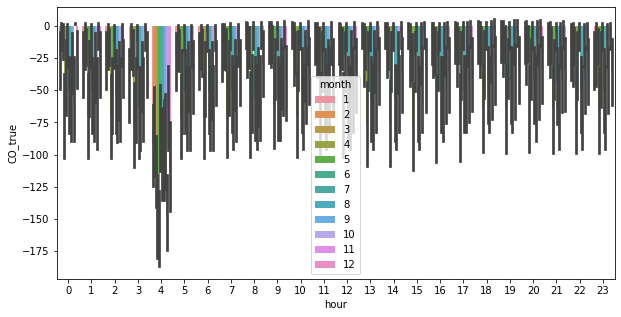

In [150]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='hour', y='CO_true', hue='month')

# pollution

In [158]:
df = pd.read_csv('./data/pollution.csv',parse_dates=['date'],index_col=0)
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [159]:
df = df.resample('D').mean()['pollution'].to_frame()

In [162]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

In [163]:
df.head()

,pollution,year,month,day
date,,,,
2010-01-02,145.958333,2010,1,2
2010-01-03,78.833333,2010,1,3
2010-01-04,31.333333,2010,1,4
2010-01-05,42.458333,2010,1,5
2010-01-06,56.416667,2010,1,6


# Barplot

## 연도별 월 오염량

<AxesSubplot:xlabel='month', ylabel='pollution'>

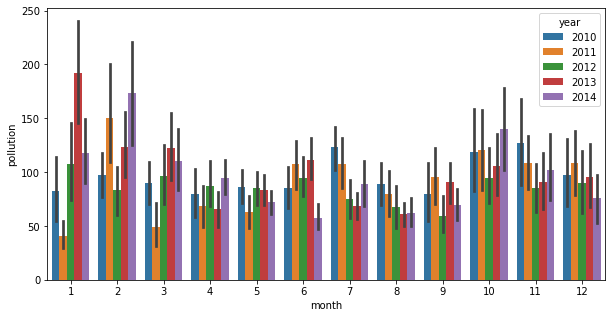

In [166]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='month',y='pollution', hue='year')

<AxesSubplot:xlabel='year', ylabel='pollution'>

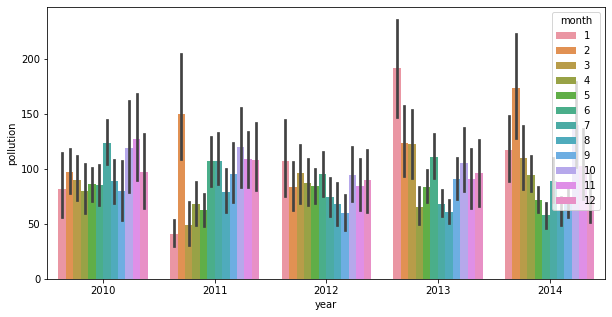

In [167]:
 plt.figure(figsize=(10,5))
sns.barplot(data=df, x='year',y='pollution', hue='month')

<AxesSubplot:xlabel='month', ylabel='pollution'>

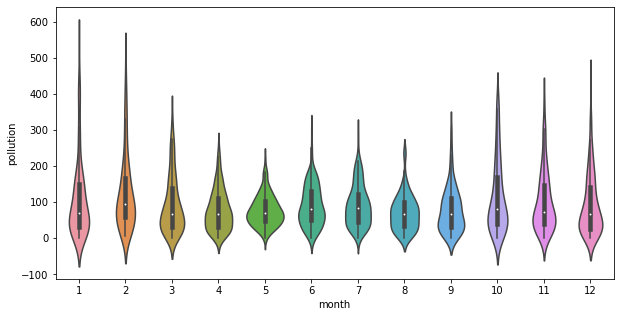

In [170]:
plt.figure(figsize=(10,5))  
sns.violinplot(data=df, x='month',y='pollution')

<AxesSubplot:xlabel='month', ylabel='pollution'>

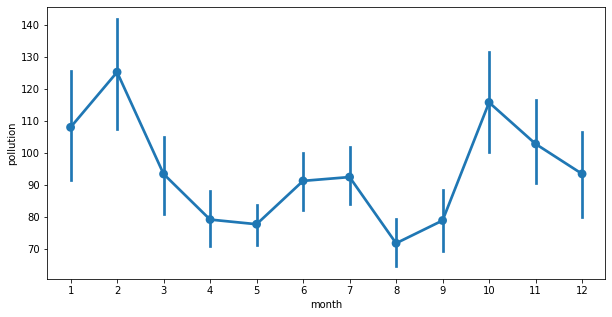

In [171]:
plt.figure(figsize=(10,5))  
sns.pointplot(data=df, x='month',y='pollution')

<AxesSubplot:xlabel='year', ylabel='pollution'>

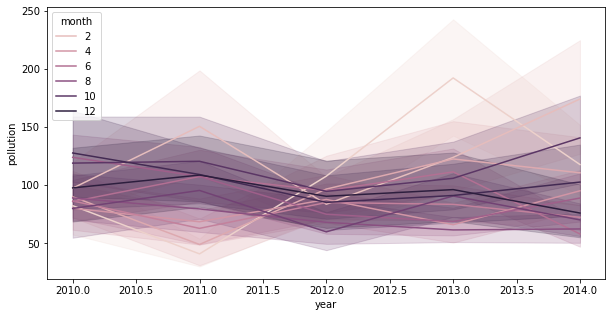

In [174]:
plt.figure(figsize=(10,5))  
sns.lineplot(data=df, x='year',y='pollution',hue='month')

<AxesSubplot:xlabel='year', ylabel='pollution'>

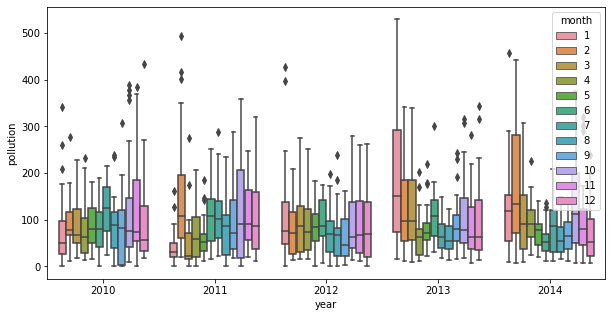

In [175]:
 plt.figure(figsize=(10,5))  
sns.boxplot(data=df, x='year',y='pollution',hue='month')